# **Topic Modeling using LDA**

Title: LA3-Topic Modeling using LDA\
Author Name: Kuan-Hung Liu\
ASI ID: 1230540209\
File Creation Date: 1/31/2024

## Library and Data Import

In [ ]:
!pip uninstall pyLDAvis

In [ ]:
!pip uninstall gensim
!pip uninstall pyLDAvis
!pip uninstall spacy
!pip uninstall numpy

Found existing installation: gensim 4.3.2
Uninstalling gensim-4.3.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/gensim-4.3.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/gensim/*
Proceed (Y/n)? y
  Successfully uninstalled gensim-4.3.2
Found existing installation: pyLDAvis 3.4.1
Uninstalling pyLDAvis-3.4.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/pyLDAvis-3.4.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pyLDAvis/*
Proceed (Y/n)? y
  Successfully uninstalled pyLDAvis-3.4.1
Found existing installation: spacy 3.6.1
Uninstalling spacy-3.6.1:
  Would remove:
    /usr/local/bin/spacy
    /usr/local/lib/python3.10/dist-packages/spacy-3.6.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/spacy/*
Proceed (Y/n)? y
  Successfully uninstalled spacy-3.6.1
Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/l

In [ ]:
!pip install gensim==4.3.2
!pip install pyLDAvis==3.4.1
!pip install spacy==3.6.1
#!pip install --upgrade numpy==1.24.4
!pip install --upgrade numpy==1.24.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 26.7 MB/s eta 0:00:00
  Using cached numpy-1.26.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
# install gensim and pyLDAvis before you run this code
from gensim import corpora
from gensim import models
import pyLDAvis
import pyLDAvis.gensim_models
import spacy
import json

In [ ]:
import spacy.cli;
spacy.cli.download("en_core_web_lg");

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [4]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/CIS_509/restaurant_reviews_az.csv', nrows=1000)
data

Mounted at /content/drive


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Sentiment
0,IVS7do_HBzroiCiymNdxDg,fdFgZQQYQJeEAshH4lxSfQ,sGy67CpJctjeCWClWqonjA,3,1,1,0,"OK, the hype about having Hatch chili in your ...",1/27/2020 22:59,1
1,QP2pSzSqpJTMWOCuUuyXkQ,JBLWSXBTKFvJYYiM-FnCOQ,3w7NRntdQ9h0KwDsksIt5Q,5,1,1,1,Pandemic pit stop to have an ice cream.... onl...,4/19/2020 5:33,1
2,oK0cGYStgDOusZKz9B1qug,2_9fKnXChUjC5xArfF8BLg,OMnPtRGmbY8qH_wIILfYKA,5,1,0,0,I was lucky enough to go to the soft opening a...,2/29/2020 19:43,1
3,E_ABvFCNVLbfOgRg3Pv1KQ,9MExTQ76GSKhxSWnTS901g,V9XlikTxq0My4gE8LULsjw,5,0,0,0,I've gone to claim Jumpers all over the US and...,3/14/2020 21:47,1
4,Rd222CrrnXkXukR2iWj69g,LPxuausjvDN88uPr-Q4cQA,CA5BOxKRDPGJgdUQ8OUOpw,4,1,0,0,"If you haven't been to Maynard's kitchen, it'...",1/17/2020 20:32,1
...,...,...,...,...,...,...,...,...,...,...
995,idzmt7q9wute-U12OXJiqQ,Ms9Y6kURlD7dGo3DMnXY5Q,3StNEgKAwpCFR1q0urmJrw,5,0,0,0,Best ramen I've ever had! Literally nothing Co...,8/29/2021 3:35,1
996,RhN-CYKz4aZm6VZlVtlMWA,XDmE8qlypJQ0CMpqop5jMg,UCMSWPqzXjd7QHq7v8PJjQ,1,1,0,0,We are trying to support local restaurants dur...,4/12/2020 17:44,0
997,#NAME?,JX7p-7wmPAMbC1861ut9RQ,v5T1Q21TT1_S_aY_G8Mf-g,4,0,0,1,We checked out this place for Taco Tuesday and...,3/22/2020 18:56,1
998,YhltcyrGQSWsrQoFeGqKQg,sBHS_gL9aTaTbTAcdrfE7w,OMnPtRGmbY8qH_wIILfYKA,5,1,0,1,"Love this place. Awesome Tucson vibes, great f...",2/12/2021 0:50,1


## The Whole Dataset
- Select a proper K
- Fit an LDA model of K topics
- Visualize results
- Interpret topics

### Coherence Measure
Based on all the review data provided, calculate coherence measure and plot it (K = 2 - 30).

In [ ]:
# TF-IDF with Data Processing
nlp = spacy.load("en_core_web_lg")

documents = []
for index, row in data.iterrows():
    text = row["text"]
    doc = nlp(text)
    if len(doc) <= 5: # exclude comments with five or less than five words
        pass
    else:
        documents.append(text.replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," "))

processed_documents = [] # list for storing tokenized documents
for document in documents:
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
            pass
        elif not nlp.vocab.has_vector(str(token)): # check whether the provided token is in a vocabulary
            pass
        else:
            temp_list.append(str(token.lemma_)) # lemmatize
    processed_documents.append(temp_list)
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=8) # train LDA model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Coherence Measures
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # by changing the values for the "coherence" parameter, you can use different coherence methods (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.26556944113079084


In [ ]:
# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(29):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2) # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-29-8985d06e50f9>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


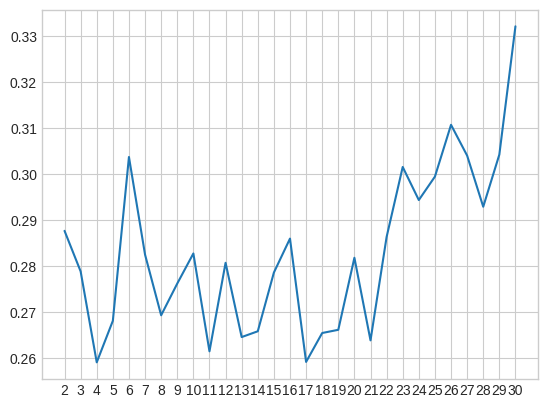

In [ ]:
# Visualizaing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

### Selection
Pick a K and explain reasoning behind your *choice*

I would like to choose **K when it equals 6** because it is a suitable number of topics and demonstrates optimal coherence performance . Although there are several points with higher scores, I am considering concerns about overfitting

.

### LDA Model
Fit an LDA model of K topics with the data and visualize it using pyLDAvis.

In [ ]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=6) # train LDA model

for topic in lda_model.show_topics(num_topics=3, num_words=5):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5, '0.003*"," + 0.002*"great" + 0.002*"-" + 0.002*"taco" + 0.002*"good"')
(1, '0.004*"," + 0.003*"order" + 0.003*"amazing" + 0.003*"good" + 0.003*"great"')
(4, '0.003*"," + 0.003*"food" + 0.003*"t" + 0.002*"great" + 0.002*"place"')
[(0, 0.4142221977959588), (1, 0.04563030846336671), (2, 0.17182972315509015), (3, 0.06568152872840585), (4, 0.0504957528956407), (5, 0.055401596256795436), (6, 0.06381181874730447), (7, 0.055401596256795436), (8, 0.5708001182828979), (9, 0.11416002365657958), (10, 0.0911472370327814), (11, 0.11416002365657958), (12, 0.12689287780876735), (13, 0.034972257937657424), (14, 0.12689287780876735), (15, 0.1014271695043918), (16, 0.07977571857871399), (17, 0.06381181874730447), (18, 0.0911472370327814), (19, 0.10671178145039806), (20, 0.12316493049742679), (21, 0.18319493036295964), (22, 0.12689287780876735), (23, 0.07379783093984099), (24, 0.028932830457169562), (25, 0.10671178145039806), (26, 0.07714700966633006), (27, 0.0812460731460225), (28, 0.0741179911100770

In [ ]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Interpretation

- On the line between Quadrant II & III, there is a dense group and the most frequnt works between the group are food, pizza,and delicious. As a result, the topic may be related to "food".

- In topic 3, the most frequent words are servie, time, and order. Therefore, the topic may related to "service".

- In topic 5, the most frequent words are food and burger. Accordingly, the topic may be related to "food" as well.

- In topic 1, the most frequent words are order and place. Consequently, the topic may be related to "envirinment".

## For 1 star reviews
- Select a proper K
- Fit an LDA model of K topics
- Visualize results
- Interpret topics

In [ ]:
# Select the Data
star_1_data = data[data["stars"]==1]
star_1_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Sentiment
5,kx6O_lyLzUnA7Xip5wh2NA,YsINprB2G1DM8qG1hbrPUg,rViAhfKLKmwbhTKROM9m0w,1,0,0,0,I stay at the Main Hotel at the Casino from Ju...,7/14/2020 16:43,0
13,PKlfSydanGs_EAeRFhpxNA,YCDZfgCTE1qSby-NEVqyMg,UCMSWPqzXjd7QHq7v8PJjQ,1,2,0,0,I don't know what happened to this place but e...,1/25/2020 22:59,0
18,7hytDrs927SL0zvlWmf1bw,MeZJe_a7xhDTE6J5Fud3ig,7L1kXfwU5XM6f6Jxo_L7Yg,1,1,0,0,Very bad service call for takeout they got our...,6/18/2020 3:36,0
20,JUHZyP20BbmuXpJl7rXx3g,YluRqSnRK2XutBJ01ajX6Q,Y3ZCO17N1_T_Ms1JmswwzA,1,0,0,0,This place is not worth it. Don't go the food ...,3/15/2020 18:06,0
22,Xu3hjf40iG1Z14ki6LmPhw,pfJGmjk8prV47Ab70EmXkA,rViAhfKLKmwbhTKROM9m0w,1,1,0,1,I was so looking forward to Del Sols re-openin...,6/3/2020 22:13,0
...,...,...,...,...,...,...,...,...,...,...
978,RITac05HQmVeDJLpn867SA,W0kWWiVWCDzgJ6spE9TTCQ,RhuYqAT45uIR2NNdDsolXQ,1,0,1,0,"Food is bland, service is terrible and you'll ...",12/16/2020 0:51,0
985,kBpYAZoJmohefp8_b_P6HQ,3l7OG-S-FebrbvX_d8nFfw,wa_bwyY57etHjtJ2Fw0E3g,1,2,0,0,Came on a Saturday night about 7 pm. Not busy...,1/12/2020 3:33,0
987,n03u4868mduHeEHW1_k4mA,57MvUHY7nTUFwsGgmfhfuQ,rViAhfKLKmwbhTKROM9m0w,1,3,0,0,I've never staid at this resort and on my time...,6/4/2021 18:35,0
990,noCpw7NBdP18W6ZOflR5kQ,Mplgu3bKw0470I3U8-KYAQ,U3aNQ5DsABPYyJQolsCbJg,1,0,0,0,"My first time at this place ,the food was tast...",2/14/2021 18:22,0


### Coherence Measure
Based on all the review data provided, calculate coherence measure and plot it (K = 2 - 30).

In [ ]:
# TF-IDF with Data Processing
nlp = spacy.load("en_core_web_lg")

documents = []
for index, row in star_1_data.iterrows():
    text = row["text"]
    doc = nlp(text)
    if len(doc) <= 5: # exclude comments with five or less than five words
        pass
    else:
        documents.append(text.replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," "))

processed_documents = [] # list for storing tokenized documents
for document in documents:
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
            pass
        elif not nlp.vocab.has_vector(str(token)): # check whether the provided token is in a vocabulary
            pass
        else:
            temp_list.append(str(token.lemma_)) # lemmatize
    processed_documents.append(temp_list)
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=8) # train LDA model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Coherence Measures
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # by changing the values for the "coherence" parameter, you can use different coherence methods (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.41952968430985293


In [ ]:
# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(29):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2) # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-40-8985d06e50f9>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


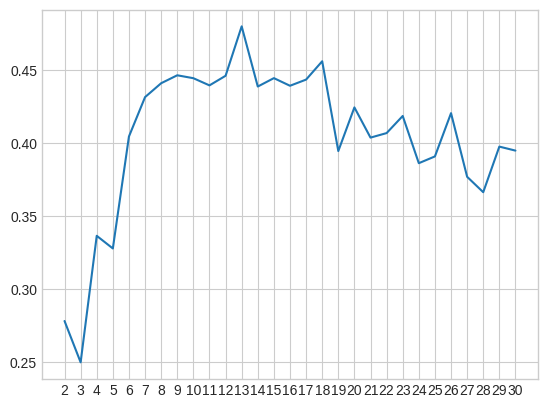

In [ ]:
# Visualizaing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

### Selection
Pick a K and explain reasoning behind your *choice*

I would like to choose **K when it equals 13** because it is a suitable number of topics and demonstrates optimal coherence performance.

### LDA Model
Fit an LDA model of K topics with the data and visualize it using pyLDAvis.

In [ ]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=13) # train LDA model

for topic in lda_model.show_topics(num_topics=3, num_words=5):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5, '0.004*"phone" + 0.004*"de" + 0.004*"item" + 0.004*"good" + 0.003*"order"')
(3, '0.004*"chili" + 0.003*"wine" + 0.003*"July" + 0.003*";" + 0.003*"onion"')
(4, '0.005*"Don" + 0.005*"worth" + 0.004*"dining" + 0.004*"party" + 0.004*"place"')
[(0, 0.058390332582598986), (1, 0.1764780679896287), (2, 0.2632482812792954), (3, 0.4517567689528151), (4, 0.22587838447640754), (5, 0.2632482812792954), (6, 0.4517567689528151), (7, 0.2632482812792954), (8, 0.07811047641889014), (9, 0.22587838447640754), (10, 0.22587838447640754), (11, 0.13910817118674085), (12, 0.22587838447640754), (13, 0.1764780679896287), (14, 0.20401839619089873), (15, 0.10741861429961425), (16, 0.18850848767351971)]
(0, 0.01629622)
(1, 0.016297113)
(2, 0.016296053)
(3, 0.8044413)
(4, 0.016296208)
(5, 0.016296124)
(6, 0.016296433)
(7, 0.016296472)
(8, 0.016297596)
(9, 0.016296094)
(10, 0.016296044)
(11, 0.016298374)
(12, 0.016296035)
I stay at the Main Hotel at the Casino from July 11 to July 13; it was the WORST experience 

In [ ]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Interpretation

- In Quadrant II, there is a dense group and the most frequnt works between the group are order and food. As a result, the topic may be related to "food".

- In topic 4 & 7, the most frequent words are wait and time. Therefore, the topic may related to "waiting time".

- In topic 2, 3 & 8, the most frequent words are wait, minute, and order. Consequently, the topic may related to "waiting time" as well.

- In topic 1, the most frequent word is McDonald's. Accordingly, the topic may be related to this "specific brand".

## For 5 star reviews
- Select a proper K
- Fit an LDA model of K topics
- Visualize results
- Interpret topics

In [ ]:
# Select the Data
star_5_data = data[data["stars"]==5]
star_5_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Sentiment
1,QP2pSzSqpJTMWOCuUuyXkQ,JBLWSXBTKFvJYYiM-FnCOQ,3w7NRntdQ9h0KwDsksIt5Q,5,1,1,1,Pandemic pit stop to have an ice cream.... onl...,4/19/2020 5:33,1
2,oK0cGYStgDOusZKz9B1qug,2_9fKnXChUjC5xArfF8BLg,OMnPtRGmbY8qH_wIILfYKA,5,1,0,0,I was lucky enough to go to the soft opening a...,2/29/2020 19:43,1
3,E_ABvFCNVLbfOgRg3Pv1KQ,9MExTQ76GSKhxSWnTS901g,V9XlikTxq0My4gE8LULsjw,5,0,0,0,I've gone to claim Jumpers all over the US and...,3/14/2020 21:47,1
6,DblKoOM1O6Bug_0b6YcpIQ,8o2iLbpduMiPefS2Gy_28g,wJmyu7W1K9A_gE8Ed4Bc9w,5,0,0,0,In town after a long weekend of hiking and cam...,1/20/2020 4:55,1
7,vW2w4F27XNIkD2toYu0PKg,t9LqNtCGuNUqBeFKWoFOPg,u4P6hqDz6-QG9PR2Pj5KIw,5,0,0,0,This is the definition of a great family-run b...,1/16/2020 4:58,1
...,...,...,...,...,...,...,...,...,...,...
991,ltlMPBwoRfgHOojiMjmWcw,ZTkuKoOt2vp584A-8hDvBA,qqArBRPcKDljT6OEmReEdw,5,3,0,3,So glad to have Seis here in Oro Valley! The s...,8/8/2021 4:27,1
992,zf32j1PBIrJua_lPO0XWyQ,qqxxzPmS9Q6W9yoZ9gzOrg,UCMSWPqzXjd7QHq7v8PJjQ,5,2,1,2,A destination brunch spot with quaint outdoor ...,12/31/2020 9:01,1
995,idzmt7q9wute-U12OXJiqQ,Ms9Y6kURlD7dGo3DMnXY5Q,3StNEgKAwpCFR1q0urmJrw,5,0,0,0,Best ramen I've ever had! Literally nothing Co...,8/29/2021 3:35,1
998,YhltcyrGQSWsrQoFeGqKQg,sBHS_gL9aTaTbTAcdrfE7w,OMnPtRGmbY8qH_wIILfYKA,5,1,0,1,"Love this place. Awesome Tucson vibes, great f...",2/12/2021 0:50,1


### Coherence Measure
Based on all the review data provided, calculate coherence measure and plot it (K = 2 - 30).

In [ ]:
# TF-IDF with Data Processing
nlp = spacy.load("en_core_web_lg")

documents = []
for index, row in star_5_data.iterrows():
    text = row["text"]
    doc = nlp(text)
    if len(doc) <= 5: # exclude comments with five or less than five words
        pass
    else:
        documents.append(text.replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," "))

processed_documents = [] # list for storing tokenized documents
for document in documents:
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
            pass
        elif not nlp.vocab.has_vector(str(token)): # check whether the provided token is in a vocabulary
            pass
        else:
            temp_list.append(str(token.lemma_)) # lemmatize
    processed_documents.append(temp_list)
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=8) # train LDA model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Coherence Measures
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # by changing the values for the "coherence" parameter, you can use different coherence methods (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.27449017483634364


In [ ]:
# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(29):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2) # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-48-8985d06e50f9>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


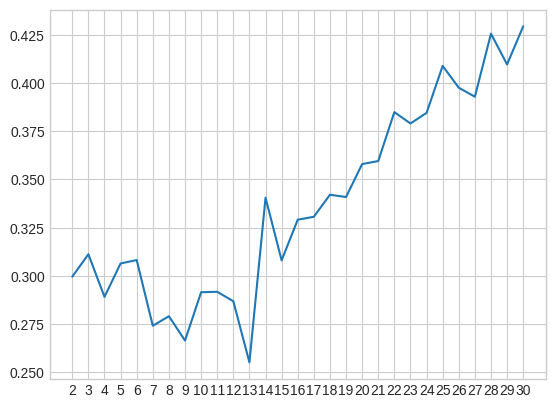

In [ ]:
# Visualizaing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

### Selection
Pick a K and explain reasoning behind your *choice*

I would like to choose **K when it equals 14** because it is a suitable number of topics and demonstrates optimal coherence performance . Although there are several points with higher scores, I am considering concerns about overfitting


### LDA Model
Fit an LDA model of K topics with the data and visualize it using pyLDAvis.

In [ ]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=14) # train LDA model

for topic in lda_model.show_topics(num_topics=3, num_words=5):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(9, '0.004*"great" + 0.004*"friendly" + 0.004*"staff" + 0.004*"," + 0.003*"definitely"')
(6, '0.003*"time" + 0.003*"," + 0.003*"come" + 0.003*"visit" + 0.003*"-"')
(5, '0.004*"great" + 0.003*"," + 0.003*"come" + 0.003*"beer" + 0.003*"nice"')
[(0, 0.015005904163518092), (1, 0.20682021462419586), (2, 0.18417837512888385), (3, 0.20682021462419586), (4, 0.20682021462419586), (5, 0.20682021462419586), (6, 0.17093374807677908), (7, 0.16153653563357181), (8, 0.13504728152936227), (9, 0.10039361296865555), (10, 0.1284923191700027), (11, 0.18417837512888385), (12, 0.0269870760051172), (13, 0.030934231972597866), (14, 0.3683567502577677), (15, 0.1388946961382598), (16, 0.11240544203405024), (17, 0.20682021462419586), (18, 0.1542474913801006), (19, 0.08395959898916229), (20, 0.11836102483268379), (21, 0.14829190858146707), (22, 0.11836102483268379), (23, 0.1542474913801006), (24, 0.18417837512888385), (25, 0.18417837512888385), (26, 0.16153653563357181), (27, 0.16153653563357181), (28, 0.20682021

In [ ]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Interpretation

- In Quadrant III, there is a dense group and the most frequnt works between the group are food, taco, meal. As a result, the topic may be related to "food".

- In topic 1 & 4, the most frequent words are staff, service, and friendly. Therefore, the topic may related to "service".

- In topic 2, the most frequent words are wait, time, and order. Therefore, the topic may related to "waiting time".

## Example Document
Based on the results for 1 star and 5 star reviews, pick 2 – 3 the most interpretable topics\
and provide some example documents related to those topics, respectively.

In [ ]:
# document in star 1 reviews
wait_1 = []
food_1 = []
service_1 = []

review_1_star = star_1_data['text']
for i in review_1_star:
  if "wait" in i:
    wait_1.append(i)
  elif "food" in i:
    food_1.append(i)
  elif "service" in i:
    service_1.append(i)
  else:
    continue

print(f"Numbers of document metion 'wait': {len(wait_1)}")
print(f"Numbers of document metion 'food': {len(food_1)}")
print(f"Numbers of document metion 'service': {len(service_1)}")
print(" ")
print(f"Document about 'waiting time' in star 1 reviews: {wait_1}")
print(f"Document about 'food' in star 1 reviews: {food_1}")
print(f"Document about 'service' in star 1 reviews: {service_1}")

Numbers of document metion 'wait': 42
Numbers of document metion 'food': 36
Numbers of document metion 'service': 13
 
Document about 'waiting time' in star 1 reviews: ["They have the worst customer service skills imaginable. Do not go there if you want a quick pizza and don't call in because they won't even keep your order. I waited for over 30 minutes after I called in an order and they told me it wasn't ready yet then it wasn't in the system. Please save your time and money go to a different one becase the people who work here don't deserve it.", 'The staff was extremely rude here. The wait staff at the snack bar did not greet us or say anything to us at all. She rolled her eyes and sighed when I requested napkins and silverware. The manager was also rude almost refusing to put up the guards for an 11 year old because it\'s only for "under 10". He was condescending and rude as well. When talking to him about the experience and how it was ruined but the terrible customer service he r

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# document in star 5 reviews
wait_5 = []
food_5 = []
service_5 = []

review_5_star = star_5_data['text']
for j in review_5_star:
  if "wait" in j:
    wait_5.append(j)
  elif "food" in j:
    food_5.append(j)
  elif "service" in j:
    service_5.append(j)
  else:
    continue

print(f"Numbers of document metion 'wait': {len(wait_5)}")
print(f"Numbers of document metion 'food': {len(food_5)}")
print(f"Numbers of document metion 'service': {len(service_5)}")
print(" ")
print(f"Document about 'waiting time' in star 5 reviews: {wait_5}")
print(f"Document about 'food' in star 5 reviews: {food_5}")
print(f"Document about 'service' in star 5 reviews: {service_5}")

Numbers of document metion 'wait': 72
Numbers of document metion 'food': 205
Numbers of document metion 'service': 43
 
Document about 'waiting time' in star 5 reviews: ["My husband and I received a gift certificate from Charro Steak.  We looked at the menu and said WOW! We were not disappointed.  The food is fabulous, the staff is very responsive and we had a wonderful experience.  Make sure you make a reservation as it a very popular restaurant.  Lucky for us we received another gift certificate.  We can't wait to go back!!", "Came here celebrating law school graduation and it was the perfect place. Can't wait to get back soon.", "What a great place to now have in town here! The vibe is modern and comfortable. We were greeted and sat as soon as we came in. We went before 5pm so we were able to take advantage of their amazing drink specials $5 pitchers of beer and $5 glasses of wine. I had rosè and it was so refreshing & crisp, and I loved it. My husbamd got Sippin pretty which was a 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Observation

I observed the documents that contain "wait," "food," and "service" in 1-star and 5-star reviews, respectively.\
I found that the number of texts including "food" is higher than those including "wait" and "service" in 5-star reviews. However, in 1-star reviews, the number of texts including "wait" is higher than those including the other two words. \
As a result, we could say that in 5-star reviews, most people praise the restaurant for its food. In 1-star reviews, on the other hand, most people complain about the waiting time.

## Acknowledgment

I did not use GenAI to create code this time, most of my code is from the template on class.\
However, I asked GenAI what I should know if I want to select the K value in coherence measure.

## Create HTML File

In [2]:
!pip install -q jupyter
!pip install -q nbconvert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.7 MB/s eta 0:00:00


In [5]:
!jupyter nbconvert "/content/drive/MyDrive/Colab Notebooks/LA3_Liu_KuanHung.ipynb" --to html

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/LA3_Liu_KuanHung.ipynb to html
[NbConvertApp] Writing 1255038 bytes to /content/drive/MyDrive/Colab Notebooks/LA3_Liu_KuanHung.html
